# Welcome to Manim!

This is a temporary test environment in which you can play around with Manim without the need of installing it locally. Some basic knowledge of Python is helpful! Keep in mind that this is a *temporary* environment, though: your changes will not be saved and cannot be shared with others. To save your work, you will need to download the notebook file ("File > Download as > Notebook (.ipynb)"). Enjoy!

> *Useful resources:* [Documentation](https://docs.manim.community), [Discord](https://discord.gg/mMRrZQW), [Reddit](https://www.reddit.com/r/manim/)

## Setup

We begin our short walkthrough by importing everything from the library. Run the following code cell to do so (focus the cell and hit the *Run* button above, or press `Shift`+`Enter` – you can find more information about how to navigate and work with Jupyter notebooks in the *Help* menu at the top of this page).

The second line controls the maximum width used to display videos in this notebook, feel free to adapt it.

In [12]:
from manim import *

config.media_width = "60%"

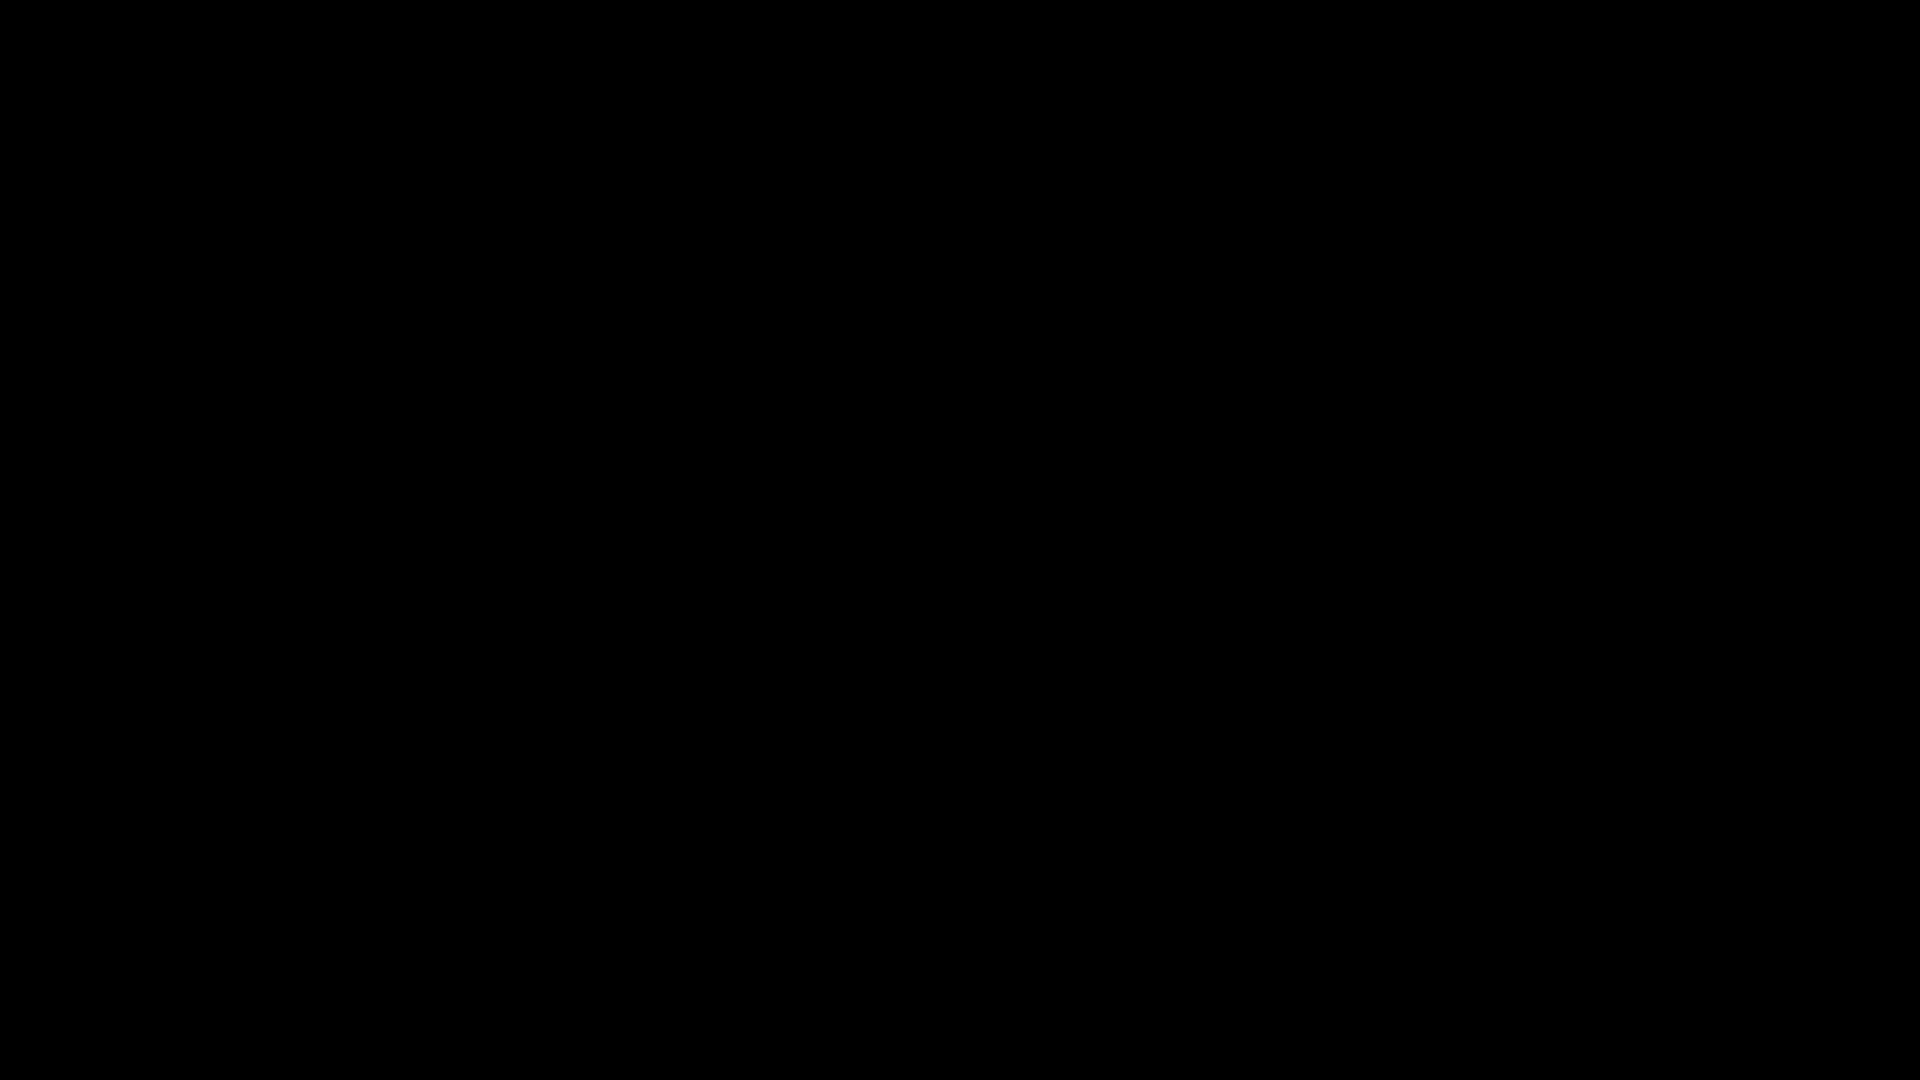

In [32]:
%%manim -s -v WARNING Test
class Test(Scene):
    def construct(self):
        L_column = Line().set_style(stroke_width=5).rotate(PI*0.5)
        R_column = L_column.copy().shift(RIGHT*3)
        roof = always_redraw(lambda:Line(start=L_column.get_end(),end=R_column.get_end()))
        
        shearwall = Rectangle(fill_color=BLUE, fill_opacity=1, height= L_column.get_length(), width=roof.get_length()*0.6)
        shearwall.set_color_by_gradient(GREY_C).scale(0.6)
        frame = VGroup(L_column, R_column, roof,).scale(0.6) # , shearwall
        # frames = frame.copy()
        storey_4 = always_redraw(lambda:
            VGroup(*[frame.copy() for _ in range(4)]).arrange(UP, buff=-0.1) # Force buffer to be 0 even in the presence of arrow tips.
        )
        dots = VGroup()
        for point in storey_4.points:
            dots.add(Dot(point, radius=0.01))

        self.add(dots.apply_function(
            lambda points: points + [np.cos(points[0]), 0, 0]
        ))

In [40]:
%%manim -ql -v WARNING Test
class Test(Scene):
    def construct(self):
                L_column = Line().set_style(stroke_width=5).rotate(PI*0.5)
                R_column = L_column.copy().shift(RIGHT*3)
                roof = always_redraw(lambda:Line(start=L_column.get_end(),end=R_column.get_end()))
                load = always_redraw(lambda:
                    Arrow(start=roof.get_start()-[1,0,0],end=roof.get_start(), buff=0)
                )
                frame = VGroup(L_column, R_column, roof, load).scale(0.6) # , shearwall
                # frames = frame.copy()
                self.add(frame)
                
                storey_4 = always_redraw(lambda:
                    VGroup(*[frame.copy() for _ in range(4)]).arrange(UP, buff=-0.1)
                )
                self.play(storey_4.animate.set_opacity(0.2))

In [ ]:
%%manim -s -v WARNING OpeningManim
from numpy import random

class OpeningManim(Scene):
    def construct(self):
      self.camera.background_color=WHITE
      sq = Square(0.5, fill_color=GREY, fill_opacity=0.2)
      sq_small = Square(0.2)
      shear_wall = VGroup(*[sq.copy() for _ in range(60)]).arrange_in_grid(6,10, buff=0).rotate(PI*0.5)
      sq_small_group = VGroup(*[sq_small.copy().set_style(stroke_width=0.4) for _ in range(350)]).arrange_in_grid(14,25, buff=0).rotate(PI*0.5)
      rec = Rectangle(height=3, width=5,stroke_width=0, fill_color=GREY, fill_opacity=1).rotate(PI*0.5)
      SUPPORT = always_redraw( lambda: Rectangle(height=4*1.15, width=0.3,fill_color=GREY,stroke_width=0, fill_opacity=1).rotate(PI*0.5).next_to(rec, DOWN, buff=0))
      shearwall_simp = ImageMobject('simp_python.png').rotate(PI*0.5).next_to(SUPPORT, UP, buff=0)
      shearwall_simp.stretch_to_fit_width(width = rec.width).stretch_to_fit_height(rec.height).shift(UP*0.535)
      self.play(Create(rec),Create(SUPPORT))
      self.wait()
      self.add(shearwall_simp.set_opacity(0))
      self.play(AnimationGroup(*[FadeIn(i) for i in shear_wall], lag_ratio=0.1))
      # self.wait()
      self.play(Transform(shear_wall, sq_small_group))
      # self.wait()
      self.play(*[i.animate.set_opacity(random.uniform(0,1)).set_style(fill_color=BLACK) for i in sq_small_group])
      # self.wait()
      self.play(*[i.animate(run_time=3, rate_func=there_and_back).set_opacity(random.uniform(0,1)).set_style(fill_color=[WHITE]) for i in sq_small_group])
      # self.wait()
      self.play(*[i.animate(run_time=3, rate_func=there_and_back).set_opacity(random.uniform(0.6,1)).set_style(fill_color=[GREY_D]) for i in sq_small_group])
      self.play(*[i.animate.set_opacity(0).set_style(fill_color=[BLACK]) for i in sq_small_group], shearwall_simp.animate.set_opacity(1), run_time=4)
      # self.play(), run_time=2),FadeIn(shearwall_simp)

In [20]:
%%manim -ql -v WARNING JustifyText
class JustifyText(Scene):
            def construct(self):
            
                intro_title = Title("Introduction")
                self.add(intro_title)
                
                Int_1 = (
                    "\tIn high-seismicity countries, buildings must be designed to resist" # from In to resist is max char
                    " seismic loading. It’s well know that RC shear walls represent a structurally" # smartly stoped at efficient
                    " efficient system to stiffen an RC building under those loads."
                )
                Int_2 = (
                    "\tIn general, a shear wall system consists of a combination of shear walls and frames" 
                    " because this type of systems normally provide the required stiffness and strength" 
                    " to withstand lateral loads in medium-high and even low rise buildings."
                )
                
                intro_1 = MarkupText(Int_1,
                     font_size=60, 
                     unpack_groups=0, 
                     font='LM Roman 12', 
                     line_spacing=1.8, 
                     disable_ligatures=1,
                     justify=1 # : that is only available in MarkupText
                ).scale(0.4).next_to(intro_title, DOWN, buff=0.5)
                
                intro_2 = MarkupText(Int_2,
                     font_size=60, 
                     unpack_groups=0, 
                     font='LM Roman 12', 
                     line_spacing=1.8, 
                     disable_ligatures=1,
                     justify=1 # : that is only available in MarkupText
                ).scale(0.4).next_to(intro_1, DOWN)
                
                
                self.play(LaggedStart(
                    Write(intro_1), Write(intro_2), lag_ratio=1
                    ),run_time=2,
                )
                self.wait(0.4)

                self.play(
                    Create(SurroundingRectangle(intro_2[1][13:23], color=RED)), 
                    Create(SurroundingRectangle(intro_2[1][26:32]), color=RED), # 's' of frames is included 
                    run_time=2,
                    rate_func=there_and_back_with_pause
                )
                # 
                self.wait(0.4)
                
                shw = intro_2[1][13:23].copy()
                fr = intro_2[1][26:32].copy()
                self.play(
                    shw.animate.to_edge(UR, buff=1.5),
                    fr.animate.next_to(intro_title, DOWN),
                    Unwrite(intro_2),Unwrite(intro_1),
                    run_time=4,
                )
                self.wait(1)
                
                self.play(Indicate(fr), shw.animate.set_opacity(0.2))
                self.wait(0.5)
                
                frame_definition = MarkupText(
                "A frame is an inter-\nconnection between \nvertical columns and \nhorizontal beams that \n" 
                "bends predominantly \nin a shear mode deformation.",
                     font_size=60,
                     font='LM Roman 12',
                     justify=1
                ).scale(0.4).align_on_border(LEFT)
                
                
                L_column = Line().set_style(stroke_width=5).rotate(PI*0.5)
                R_column = L_column.copy().shift(RIGHT*3)
                roof = always_redraw(lambda:Line(start=L_column.get_end(),end=R_column.get_end()))
                load = always_redraw(lambda:
                    Arrow(start=roof.get_start()-[1,0,0],end=roof.get_start(), buff=0)
                )
                shearwall = Rectangle(fill_color=BLUE, fill_opacity=1, height= L_column.get_length(), width=roof.get_length()*0.6)
                shearwall.set_color_by_gradient(GREY_C).scale(0.6)
                frame = VGroup(L_column, R_column, roof, load).scale(0.6) # , shearwall
                # frames = frame.copy()
                storey_4 = always_redraw(lambda:
                    VGroup(*[frame.copy() for _ in range(4)]).arrange(UP, buff=-0.1).next_to(fr, DOWN, buff=0.4) # Force buffer to be 0 even in the presence of arrow tips.
                )
                
                
                # storey_4[0].add(fix1,fix1) # just put them inside ( , ), not in a list like that []

                loads = VGroup()
                for element in storey_4:
                    if element==storey_4[0]:
                        self.play(Create(element[:-1]), Write(frame_definition), run_time=3) # shear walls and loads are not included (-1, -2)
                        # here add support for the first storey
                    else:
                        self.play(Create(element[:-1]))
                    loads.add(element[3])
                   # shearwalls.add(element[4])
                self.wait()

                self.play(FadeIn(loads, shift=RIGHT*7, scale=2))
                self.wait(0.05)
                
                
                self.play(
                    storey_4.animate(run_time=2).apply_function( # /!\shear walls should not be included in this deformation
                        # lambda p: p + np.array([np.sqrt(abs(p[1]))*p[1]**2,0, 0]
                        lambda p: p + np.array([np.sin(p[1]), 0, 0]
                    )
                ).set_color([RED, YELLOW ,RED]),)
                self.wait(0.3)

                self.play(AnimationGroup(
                    Unwrite(frame_definition), fr.animate.shift(LEFT*5), 
                    # fr.animate.set_opacity(0.3), #??????????
                    # storey_4.animate.set_opacity(0.3), #??????????
                    lag_ratio=1
                )                
                )
                
                self.wait()
                
                shearwalls = VGroup()
                for i in range(4):
                    shearwalls.add(shearwall.copy())
                    print(shearwalls)
                shearwalls.arrange(UP, buff=0).next_to(shw, DOWN, buff=0.6)
                shearwalls.add(Rectangle(height=1, width=3).next_to(shearwalls[0], DOWN, buff=0))
                self.play(*[Create(element) for element in shearwalls]) # shear walls and loads are not included (-1, -2)
                self.wait(1)
                shearwall_definition = MarkupText('Shear walls are vertical elements \nof the horizontal force' 
                                                  'resisting \nsystem. \nShear walls deflects predominantly \nin a '
                                                  'bending mode deformation \nlike a cantilever, as illustrated '
                                                  'in \nthe following animation.',
                                                  font_size=60,
                                                  font='LM Roman 12',
                                                  justify = 1,

                ).scale(0.4).next_to(shearwalls, LEFT, buff=1)

                self.play(Write(shearwall_definition))
                
                self.play(loads.animate.next_to(shearwalls, LEFT, buff=0).shift(UP*0.58))
                self.wait()
                '''
                interactions = VGroup()
                # for jf, fd in zip(range(4), [1, 0.6, 0.3, 0.15])
                inter1 = always_redraw(lambda:
                    Arrow(start=storey_4[0][4].get_corner(UL),end=storey_4[0][1].get_end(), color=RED_B, buff=0)
                )
                # self.add(inter1)
                # self.play(shearwalls.animate(run_time = 2).shift(RIGHT*3))
                # self.wait() #Always end with wait
                # 
                '''

VGroup of 1 submobjects
VGroup of 2 submobjects
VGroup of 3 submobjects
VGroup of 4 submobjects


In [ ]:
%%manim -ql -v WARNING Dots
from manim import *
from PIL import Image, ImageOps
import numpy as np
import random as r
from tqdm import tqdm

img = Image.open("simp_python.png")
dot_map = np.zeros(img.size)
size = img.size[0]
img = np.array(ImageOps.grayscale(img))
img = img.T[:,::-1]

count = 125000

class Dots(Scene):
    def construct(self):
        dots = []
        for i in tqdm(range(count)):
            test = True
            while test:
                x = r.randint(0, size-1)
                y = r.randint(0, size-1)

                if dot_map[x,y] == 0:
                    test = False
                else:
                    dot_map[x,y] = 1

            d = Dot([(x/size)*10-5,(y/size)*10-5,0], 0.01)

            dots.append(Succession(FadeIn(d, runtime=0.1), FadeToColor(d, "#" + hex(img[x,y])[2:]*3, run_time=3)))

        self.play(AnimationGroup(*dots, lag_ratio=0.00005))
        self.wait(5)

If you have executed the cell successfully, a message printing the installed version of the library should have appeared below it.

## Your first Scene

Manim generates videos by rendering *Scenes*. These are special classes that have a `construct` method describing the animations that should be rendered. (For the sake of this tutorial it doesn't matter if you are not that familiar with Python or object-oriented programming terminology like *class* or *method* – but you should consider working through a Python tutorial if you want to keep learning Manim.)

Enough of fancy words, let us look at an example. Run the cell below to render and display a video.

In [ ]:
%%manim -v WARNING -qm CircleToSquare

class CircleToSquare(Scene):
    def construct(self):
        blue_circle = Circle(color=BLUE, fill_opacity=0.5)
        green_square = Square(color=GREEN, fill_opacity=0.8)
        self.play(Create(blue_circle))
        self.wait()
        
        self.play(Transform(blue_circle, green_square))
        self.wait()

While parts of this example might seem self-explanatory, we'll still go over it step by step. First,
```
%%manim -v WARNING -qm CircleToSquare
```
is a *magic command*, it only works within Jupyter notebooks. It is very similar to how you would call `manim` from a terminal: `-v WARNING` mutes information that isn't that relevant for us right now (you can try to run the cell after removing it to see what it does). The flag `-qm` controls the render quality, it is shorthand for `--quality=m`, medium rendering quality. This means that the video will be rendered in 720p with 30 fps. (Try to change it to `-qh` or `-ql` for *high* and *low* quality, respectively!)

Finally, `CircleToSquare` is the name of the scene class you want to render in this particular cell, which already brings us to the next few lines:
```py
class CircleToSquare(Scene):
    def construct(self):
        [...]
```
This defines a Manim scene named `CircleToSquare`, and defines a custom `construct` method which acts as the *blueprint* for the video. The content of the `construct` method describes what exactly is rendered in the video. 
```py
blue_circle = Circle(color=BLUE, fill_opacity=0.5)
green_square = Square(color=GREEN, fill_opacity=0.8)
```
The first two lines create a `Circle` and a `Square` object with the specified colors and fill opacities. However, these are not added to the scene yet! To do that, you either have to use `self.add`, or ...
```py
self.play(Create(blue_circle))
self.wait()
```
... by playing an animation that adds a Manim object (*Mobject*) to the scene. Within the method, `self` references the current scene, `self.play(my_animation)` can be read as "*This scene should play my animation.*" 

`Create` is such an animation, but there are many others (for example `FadeIn`, or `DrawBorderThenFill` – try them out above!). The `self.wait()` call does exactly what you would expect: it pauses the video for a while (by default: one second). Change it to `self.wait(2)` for a two-second pause, and so on.

The final two lines,
```
self.play(Transform(blue_circle, green_square))
self.wait()
```
are responsible for the actual transformation from the blue circle to the green square (plus a one second pause afterwards).

## Positioning Mobjects and moving them around

New problem: We want to create a scene in which a circle is created while simultaneously some text is written below it. We can reuse our blue circle from above, and then add some new code:

In [ ]:
%%manim -v WARNING -qm HelloCircle

class HelloCircle(Scene):
    def construct(self):
        # blue_circle = Circle(color=BLUE, fill_opacity=0.5)
        # We can also create a "plain" circle and add the desired attributes via set methods:
        circle = Circle()
        blue_circle = circle.set_color(BLUE).set_opacity(0.5)
        
        label = Text("A wild circle appears!")
        label.next_to(blue_circle, DOWN, buff=0.5)
        
        self.play(Create(blue_circle), Write(label))
        self.wait()

Apparently, text can be rendered by using a `Text` Mobject – and the desired position is achieved by the line
```py
label.next_to(blue_circle, DOWN, buff=0.5)
```
Mobjects have a few methods for positioning, `next_to` is one of them (`shift`, `to_edge`, `to_corner`, `move_to` are a few others – check them out in our [documentation](https://docs.manim.community/) by using the search bar on the left!). For `next_to`, the first argument that is passed (`blue_circle`) describes next to which object our `label` should be placed. The second argument, `DOWN`, describes the direction (try changing it to `LEFT`, `UP`, or `RIGHT` instead!). And finally, `buff=0.5` controls the "buffer distance" between `blue_circle` and `label`, increasing this value will push `label` further down.

But also note that the `self.play` call has been changed: it is possible to pass several animation arguments to `self.play`, they will then be played simultaneously. If you want to play them one after the other, replace the `self.play` call with the lines
```py
self.play(Create(blue_circle))
self.play(Write(label))
```
and see what happens.

By the way, Mobjects naturally also have non-positioning related methods: for example, to get our blue circle, we could also create a default one, and then set color and opacity:
```py
circle = Circle()
blue_transparent_circle = circle.set_color(BLUE)
blue_circle = blue_transparent_circle.set_opacity(0.5)
```
A shorter version of this would be
```py
blue_circle = Circle().set_color(BLUE).set_opacity(0.5)
```
For now, we will stick with setting the attributes directly in the call to `Circle`.

## Animating Method calls: the `.animate` syntax

In the last example we have encountered the `.next_to` method, one of many (!) methods that modify Mobjects in one way or the other. But what if we wanted to animate how a Mobject changes when one of these methods is applied, say, when we `.shift` something around, or `.rotate` a Mobject, or maybe `.scale` it? The `.animate` syntax is the answer to this question, let us look at an example.

In [ ]:
%%manim -v WARNING -qm CircleAnnouncement

class CircleAnnouncement(Scene):
    def construct(self):
        blue_circle = Circle(color=BLUE, fill_opacity=0.5)
        announcement = Text("Let us draw a circle.")
        
        self.play(Write(announcement))
        self.wait()
        
        self.play(announcement.animate.next_to(blue_circle, UP, buff=0.5))
        self.play(Create(blue_circle))

Where we would normally use `announcement.next_to(blue_circle, UP, buff=0.5)` to position the text without animation, we can prepend `.animate` to the method call to turn the application of the method into an animation which can then be played using `self.play`. This works with all methods that modify a Mobject in some way:

In [ ]:
%%manim -v WARNING -qm AnimateSyntax

class AnimateSyntax(Scene):
    def construct(self):
        triangle = Triangle(color=RED, fill_opacity=1)
        self.play(DrawBorderThenFill(triangle))
        self.play(triangle.animate.shift(LEFT))
        self.play(triangle.animate.shift(RIGHT).scale(2))
        self.play(triangle.animate.rotate(PI/3))

In the first play call the triangle is created, in the second it is shifted to the left, then in the third it is shifted back to the right and simultaneously scaled by a factor of 2, and finally in the fourth call it is rotated by an angle of $\pi/3$. Run the cell above again after modifying some of the values, or trying other methods like, e.g., `set_color`).

When looking closely at the last animation from the scene above, the rotation, you might notice that this is not *actually* a rotation. The triangle is transformed to a rotated version of itself, but during the animation the vertices of the triangle don't move along an arc (as they would when the triangle was rotated around its center), but rather along straight lines, which gives the animation the impression that the triangle first shrinks a bit and then grows again.

This is actually **not a bug**, but a consequence of how the `.animate` syntax works: the animation is constructed by specifying the starting state (the `triangle` Mobject in the example above), and the final state (the rotated mobject, `triangle.rotate(PI/3)`). Manim then tries to interpolate between these two, but doesn't actually know that you would like to smoothly rotate the triangle. The following example illustrates this clearly:

In [ ]:
%%manim -v WARNING -qm DifferentRotations

class DifferentRotations(Scene):
    def construct(self):
        left_square = Square(color=BLUE, fill_opacity=0.7).shift(2*LEFT)
        right_square = Square(color=GREEN, fill_opacity=0.7).shift(2*RIGHT)
        self.play(left_square.animate.rotate(PI), Rotate(right_square, angle=PI), run_time=2)
        self.wait()

## Typesetting Mathematics

Manim supports rendering and animating LaTeX, the markup language mathematics is very often typeset in. Learn more about it [in this 30 minute tutorial](https://www.overleaf.com/learn/latex/Learn_LaTeX_in_30_minutes).

Here is a simple example for working with LaTeX in Manim:

In [ ]:
%%manim -v WARNING -qm CauchyIntegralFormula

class CauchyIntegralFormula(Scene):
    def construct(self):
        formula = MathTex(r"[z^n]f(z) = \frac{1}{2\pi i}\oint_{\gamma} \frac{f(z)}{z^{n+1}}~dz")
        self.play(Write(formula), run_time=3)
        self.wait()

As this example demonstrates, `MathTex` allows to render simple (math mode) LaTeX strings. If you want to render "normal mode" LaTex, use `Tex` instead.

Of course, Manim can also help you to visualize transformations of typeset formulae. Consider the following example:

In [ ]:
%%manim -v WARNING -qm TransformEquation

class TransformEquation(Scene):
    def construct(self):
        eq1 = MathTex("42 {{ a^2 }} + {{ b^2 }} = {{ c^2 }}")
        eq2 = MathTex("42 {{ a^2 }} = {{ c^2 }} - {{ b^2 }}")
        eq3 = MathTex(r"a^2 = \frac{c^2 - b^2}{42}")
        self.add(eq1)
        self.wait()
        self.play(TransformMatchingTex(eq1, eq2))
        self.wait()
        self.play(TransformMatchingShapes(eq2, eq3))
        self.wait()

In this last example, `eq1` and `eq2` have some double braces positions where, conventionally, there wouldn't be any in plain LaTeX. This is special Manim notation that groups the resulting `Tex` Mobjects `eq1` and `eq2` in a particular way.

This special notation is helpful when using the `TransformMatchingTex` animation: it will transform parts with equal TeX strings (for example, `a^2` to `a^2`) into each other – and without the special notation, the equation is considered to be one long TeX string. In comparison, `TransformMatchingShapes` is less smart: it simply tries to transform shapes that "look the same" into each other – nonetheless, it is still often very useful.

If you have made it this far, you should have a first impression of basic usage of the library. You can find a few more advanced examples that illustrate some more specialized concepts in the library below. Go ahead, try to play around and modify them just like you did for the ones above! Explore our [documentation](https://docs.manim.community) to get an idea about things that are already implemented – and look at the source code in case you want to build some more complex objects yourself.

The [community](https://www.manim.community/discord/) is certainly also happy to answer questions – and we hope you share your awesome projects with us! **Happy *manimating*!**

## Some more specialized examples

Before you delve right into these examples: please note that they illustrate specialized concepts, they are meant to give you a feeling for how more complex scenes are setup and coded. The examples don't come with additional explanation, they are **not intended as (entry level) learning resources**.

In [ ]:
%%manim -v WARNING -qm FormulaEmphasis

class FormulaEmphasis(Scene):
    def construct(self):
        product_formula = MathTex(
            r"\frac{d}{dx} f(x)g(x) =",
            r"f(x) \frac{d}{dx} g(x)",
            r"+",
            r"g(x) \frac{d}{dx} f(x)"
        )
        self.play(Write(product_formula))
        box1 = SurroundingRectangle(product_formula[1], buff=0.1)
        box2 = SurroundingRectangle(product_formula[3], buff=0.1)
        self.play(Create(box1))
        self.wait()
        self.play(Transform(box1, box2))
        self.wait()

In [ ]:
%%manim -v WARNING -qm PlotExample

class PlotExample(Scene):
    def construct(self):
        plot_axes = Axes(
            x_range=[0, 1, 0.05],
            y_range=[0, 1, 0.05],
            x_length=9,
            y_length=5.5,
            axis_config={
                "numbers_to_include": np.arange(0, 1 + 0.1, 0.1),
                "font_size": 24,
            },
            tips=False,
        )

        y_label = plot_axes.get_y_axis_label("y", edge=LEFT, direction=LEFT, buff=0.4)
        x_label = plot_axes.get_x_axis_label("x")
        plot_labels = VGroup(x_label, y_label)

        plots = VGroup()
        for n in np.arange(1, 20 + 0.5, 0.5):
            plots += plot_axes.plot(lambda x: x**n, color=WHITE)
            plots += plot_axes.plot(
                lambda x: x**(1 / n), color=WHITE, use_smoothing=False
            )

        extras = VGroup()
        extras += plot_axes.get_horizontal_line(plot_axes.c2p(1, 1, 0), color=BLUE)
        extras += plot_axes.get_vertical_line(plot_axes.c2p(1, 1, 0), color=BLUE)
        extras += Dot(point=plot_axes.c2p(1, 1, 0), color=YELLOW)
        title = Title(
            r"Graphs of $y=x^{\frac{1}{n}}$ and $y=x^n (n=1, 1.5, 2, 2.5, 3, \dots, 20)$",
            include_underline=False,
            font_size=40,
        )
        
        self.play(Write(title))
        self.play(Create(plot_axes), Create(plot_labels), Create(extras))
        self.play(AnimationGroup(*[Create(plot) for plot in plots], lag_ratio=0.05))

In [ ]:
%%manim -v WARNING -qm ErdosRenyiGraph

import networkx as nx

nxgraph = nx.erdos_renyi_graph(14, 0.5)

class ErdosRenyiGraph(Scene):
    def construct(self):
        G = Graph.from_networkx(nxgraph, layout="spring", layout_scale=3.5)
        self.play(Create(G))
        self.play(*[G[v].animate.move_to(5*RIGHT*np.cos(ind/7 * PI) +
                                         3*UP*np.sin(ind/7 * PI))
                    for ind, v in enumerate(G.vertices)])
        self.play(Uncreate(G))

In [ ]:
%%manim -v WARNING -qm CodeFromString

class CodeFromString(Scene):
    def construct(self):
        code = '''from manim import Scene, Square

class FadeInSquare(Scene):
    def construct(self):
        s = Square()
        self.play(FadeIn(s))
        self.play(s.animate.scale(2))
        self.wait()
'''
        rendered_code = Code(code=code, tab_width=4, background="window",
                            language="Python", font="Monospace")
        self.play(Write(rendered_code))
        self.wait(2)

In [ ]:
%%manim -qm -v WARNING OpeningManim

class OpeningManim(Scene):
    def construct(self):
        title = Tex(r"This is some \LaTeX")
        basel = MathTex(r"\sum_{n=1}^\infty \frac{1}{n^2} = \frac{\pi^2}{6}")
        VGroup(title, basel).arrange(DOWN)
        self.play(
            Write(title),
            FadeIn(basel, shift=UP),
        )
        self.wait()

        transform_title = Tex("That was a transform")
        transform_title.to_corner(UP + LEFT)
        self.play(
            Transform(title, transform_title),
            LaggedStart(*[FadeOut(obj, shift=DOWN) for obj in basel]),
        )
        self.wait()

        grid = NumberPlane(x_range=(-10, 10, 1), y_range=(-6.0, 6.0, 1))
        grid_title = Tex("This is a grid")
        grid_title.scale(1.5)
        grid_title.move_to(transform_title)

        self.add(grid, grid_title)
        self.play(
            FadeOut(title),
            FadeIn(grid_title, shift=DOWN),
            Create(grid, run_time=3, lag_ratio=0.1),
        )
        self.wait()

        grid_transform_title = Tex(
            r"That was a non-linear function \\ applied to the grid"
        )
        grid_transform_title.move_to(grid_title, UL)
        grid.prepare_for_nonlinear_transform()
        self.play(
            grid.animate.apply_function(
                lambda p: p + np.array([np.sin(p[1]), np.sin(p[0]), 0])
            ),
            run_time=3,
        )
        self.wait()
        self.play(Transform(grid_title, grid_transform_title))
        self.wait()